In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
%matplotlib inline

In [2]:
listings = pd.read_csv('cleaned_listings.csv')

In [3]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61082,-122.29082,Entire home/apt,296,7,29,2019/10/31,0.21,2,59
1,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.52398,-122.35989,Entire home/apt,48,3,462,2018/11/24,3.92,1,0
2,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65411,-122.33761,Entire home/apt,90,2,150,2019/9/28,1.19,3,49
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55062,-122.32014,Private room,62,2,146,2019/10/22,1.29,8,359
4,9460,Downtown Convention Center B&B -- Free Minibar,30832,Siena,Downtown,First Hill,47.61265,-122.32936,Private room,99,3,455,2019/11/9,3.65,4,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,40176359,2 clean private rooms big window in North Seattle,7435040,Chengying,Northgate,Haller Lake,47.72269,-122.33539,Private room,80,2,0,NaN,NaN,8,234
8790,40183149,Laurel's House,21013086,Ron Paul,Other neighborhoods,Fremont,47.65662,-122.34548,Entire home/apt,60,30,0,NaN,NaN,2,176
8791,40183377,Entire House *Walker’s Pradise*Good Transit,289666185,Nhat,Rainier Valley,Columbia City,47.56200,-122.29087,Entire home/apt,89,1,0,NaN,NaN,1,356
8792,40197071,Steps to Pike Place and Gum Wall,226137890,Xenia,Downtown,Pike-Market,47.60866,-122.33936,Entire home/apt,107,1,0,NaN,NaN,11,25


In [4]:
listings.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [5]:
df = listings[["neighbourhood_group", "room_type", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]]

In [6]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Central Area,Entire home/apt,296,7,29,0.21,59
1,Delridge,Entire home/apt,48,3,462,3.92,0
2,Other neighborhoods,Entire home/apt,90,2,150,1.19,49
3,Other neighborhoods,Private room,62,2,146,1.29,359
4,Downtown,Private room,99,3,455,3.65,138


In [7]:
(len(df)-df.count())/len(df)*100

neighbourhood_group     0.000000
room_type               0.000000
price                   0.000000
minimum_nights          0.000000
number_of_reviews       0.000000
reviews_per_month      13.475097
availability_365        0.000000
dtype: float64

In [8]:
#Only reviews_per_month has NaN value

In [9]:
df2 = df.drop(columns='reviews_per_month')

In [10]:
df2

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Central Area,Entire home/apt,296,7,29,59
1,Delridge,Entire home/apt,48,3,462,0
2,Other neighborhoods,Entire home/apt,90,2,150,49
3,Other neighborhoods,Private room,62,2,146,359
4,Downtown,Private room,99,3,455,138
...,...,...,...,...,...,...
8789,Northgate,Private room,80,2,0,234
8790,Other neighborhoods,Entire home/apt,60,30,0,176
8791,Rainier Valley,Entire home/apt,89,1,0,356
8792,Downtown,Entire home/apt,107,1,0,25


In [11]:
df2.dtypes

neighbourhood_group    object
room_type              object
price                   int64
minimum_nights          int64
number_of_reviews       int64
availability_365        int64
dtype: object

In [12]:
df2.columns = df2.columns.str.strip()
df2['neighbourhood_group'] = df2['neighbourhood_group'].astype(str) 
df2['room_type'] = df2['room_type'].astype(str)

In [13]:
df2.dtypes

neighbourhood_group    object
room_type              object
price                   int64
minimum_nights          int64
number_of_reviews       int64
availability_365        int64
dtype: object

In [14]:
df2["neighbourhood_group"]

0              Central Area
1                  Delridge
2       Other neighborhoods
3       Other neighborhoods
4                  Downtown
               ...         
8789              Northgate
8790    Other neighborhoods
8791         Rainier Valley
8792               Downtown
8793           West Seattle
Name: neighbourhood_group, Length: 8794, dtype: object

In [15]:
df2.neighbourhood_group.unique()

array(['Central Area', 'Delridge', 'Other neighborhoods', 'Downtown',
       'West Seattle', 'Ballard', 'Capitol Hill', 'Cascade',
       'Beacon Hill', 'Seward Park', 'Northgate', 'Queen Anne',
       'Rainier Valley', 'Magnolia', 'Lake City', 'University District',
       'Interbay'], dtype=object)

In [16]:
neighbourhood_count = {}
neighbourhood_price = {}
for row in df2.itertuples():
    if(row[1] in neighbourhood_count):
        neighbourhood_count[row[1]] += 1
    if(row[1] not in neighbourhood_count):
        neighbourhood_count[row[1]] = 0
    if(row[1] in neighbourhood_price):
        neighbourhood_price[row[1]] += row[3]
    if(row[1] not in neighbourhood_price):
        neighbourhood_price[row[1]] = 0
        neighbourhood_price[row[1]] += row[3]

In [17]:
neighbourhood_count

{'Central Area': 781,
 'Delridge': 267,
 'Other neighborhoods': 1635,
 'Downtown': 1521,
 'West Seattle': 482,
 'Ballard': 453,
 'Capitol Hill': 915,
 'Cascade': 418,
 'Beacon Hill': 322,
 'Seward Park': 83,
 'Northgate': 220,
 'Queen Anne': 644,
 'Rainier Valley': 431,
 'Magnolia': 163,
 'Lake City': 148,
 'University District': 255,
 'Interbay': 39}

In [18]:
neighbourhood_price

{'Central Area': 118653,
 'Delridge': 26305,
 'Other neighborhoods': 201511,
 'Downtown': 285197,
 'West Seattle': 68165,
 'Ballard': 68763,
 'Capitol Hill': 136144,
 'Cascade': 70077,
 'Beacon Hill': 36154,
 'Seward Park': 10740,
 'Northgate': 20754,
 'Queen Anne': 119643,
 'Rainier Valley': 52207,
 'Magnolia': 27655,
 'Lake City': 18717,
 'University District': 27320,
 'Interbay': 4213}

In [19]:
neighbourhood_average_price = {}
for area in neighbourhood_price.keys():
    neighbourhood_average_price[area] = neighbourhood_price[area] / neighbourhood_count[area]
neighbourhood_average_price

{'Central Area': 151.92445582586427,
 'Delridge': 98.52059925093633,
 'Other neighborhoods': 123.24831804281345,
 'Downtown': 187.50624589086127,
 'West Seattle': 141.42116182572613,
 'Ballard': 151.79470198675497,
 'Capitol Hill': 148.7912568306011,
 'Cascade': 167.64832535885168,
 'Beacon Hill': 112.27950310559007,
 'Seward Park': 129.3975903614458,
 'Northgate': 94.33636363636364,
 'Queen Anne': 185.7810559006211,
 'Rainier Valley': 121.12993039443155,
 'Magnolia': 169.66257668711657,
 'Lake City': 126.46621621621621,
 'University District': 107.13725490196079,
 'Interbay': 108.02564102564102}

Text(0.5, 1.0, 'Histogram of listing prices')

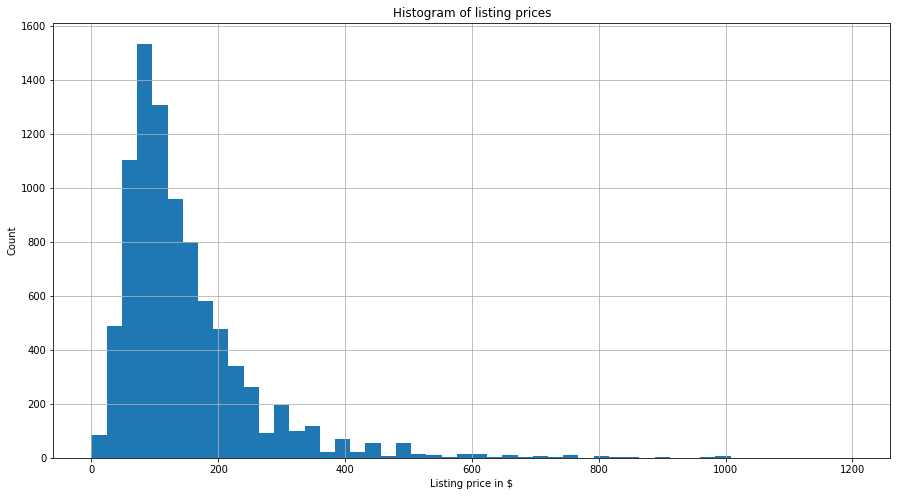

In [20]:
df2['price'].hist(bins=50, range=[0, 1200], figsize=(15,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

Text(0.5, 1.0, 'Neighbourhood vs Average Listing Price in $')

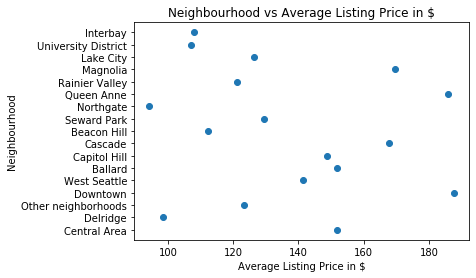

In [21]:
plt.scatter(neighbourhood_average_price.values(), neighbourhood_average_price.keys())
plt.ylabel('Neighbourhood')
plt.xlabel('Average Listing Price in $')
plt.title('Neighbourhood vs Average Listing Price in $')

In [22]:
downtown = []
northgate = []
cascade = []
capitol_hill = []
university_district = []
queen_anne = []

for row in df2.itertuples():
    if row[1] == "Downtown":
        downtown.append(row[3])
    if row[1] == "Northgate":
        northgate.append(row[3])
    if row[1] == "Cascade":
        cascade.append(row[3])
    if row[1] == "Capitol Hill":
        capitol_hill.append(row[3])
    if row[1] == "University District":
        university_district.append(row[3])
    if row[1] == "Queen Anne":
        queen_anne.append(row[3])

Text(0.5, 1.0, 'Histogram of Listing Prices in Downtown')

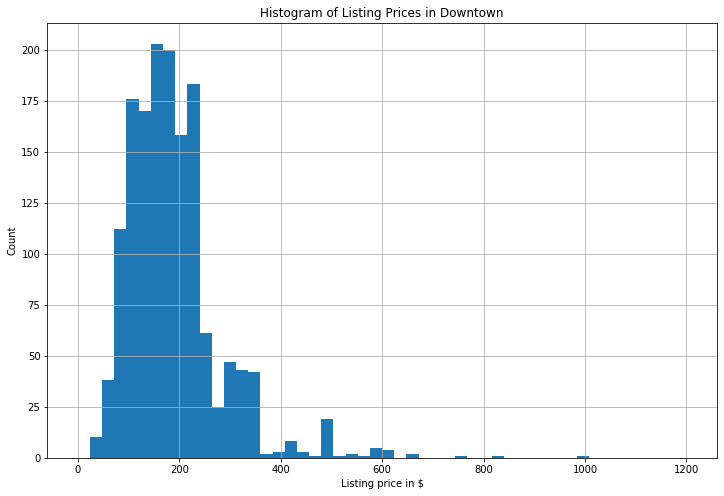

In [23]:
pd.DataFrame(downtown).hist(bins=50, range=[0, 1200], figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in Downtown')

Text(0.5, 1.0, 'Histogram of Listing Prices in Northgate')

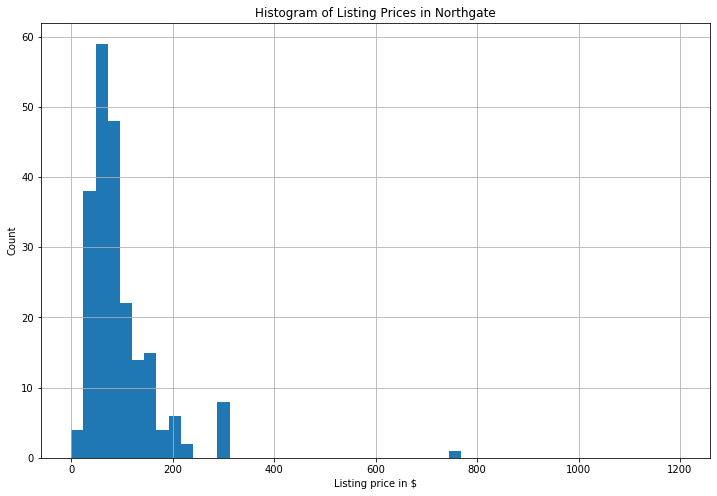

In [24]:
pd.DataFrame(northgate).hist(bins=50, range=[0, 1200], figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in Northgate')

Text(0.5, 1.0, 'Histogram of Listing Prices in Cascade')

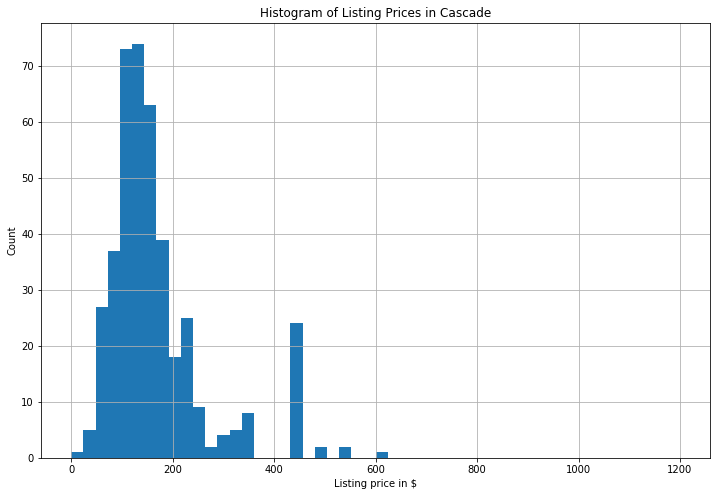

In [25]:
pd.DataFrame(cascade).hist(bins=50, range=[0, 1200], figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in Cascade')

Text(0.5, 1.0, 'Histogram of Listing Prices in Capitol Hill')

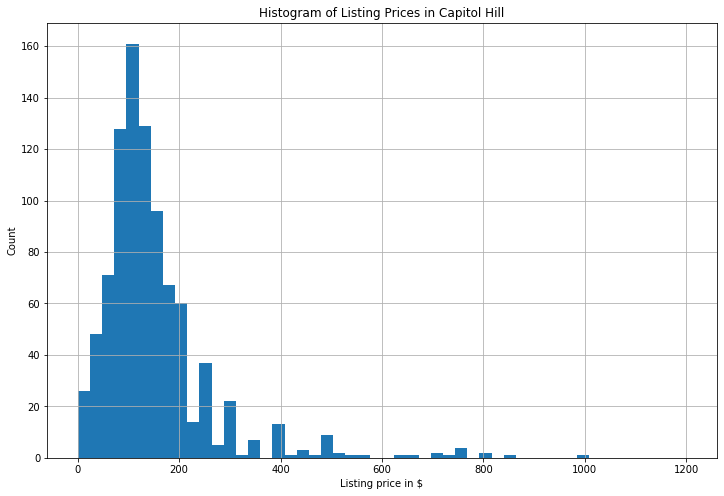

In [26]:
pd.DataFrame(capitol_hill).hist(bins=50, range=[0, 1200], figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in Capitol Hill')

Text(0.5, 1.0, 'Histogram of Listing Prices in University District')

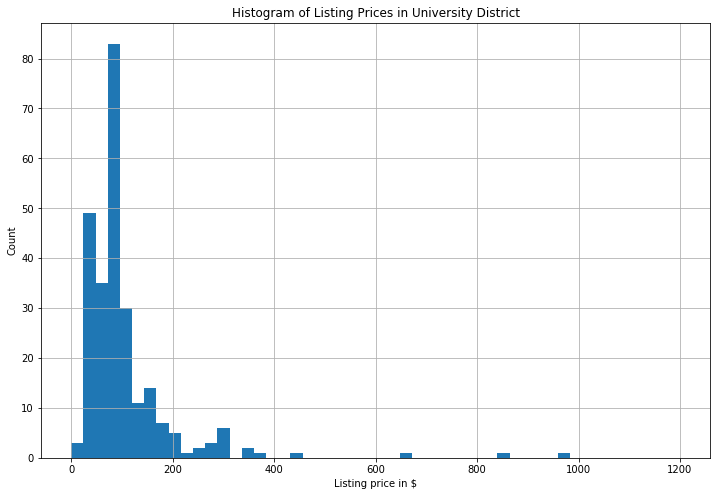

In [27]:
pd.DataFrame(university_district).hist(bins=50, range=[0, 1200], figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in University District')

Text(0.5, 1.0, 'Histogram of Listing Prices in Queen Anne')

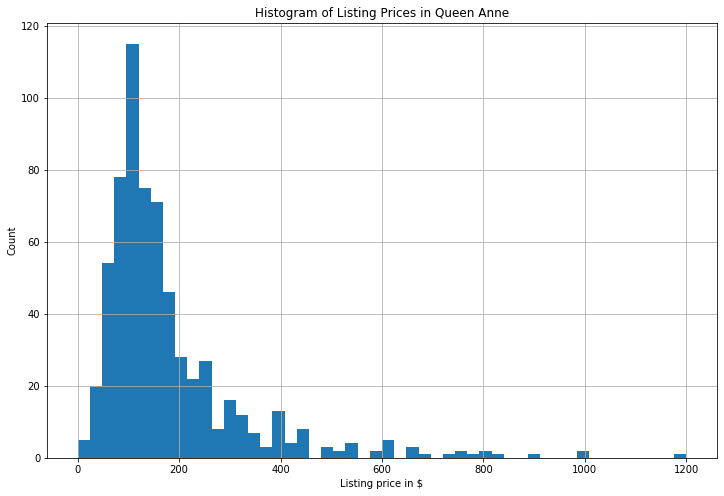

In [28]:
pd.DataFrame(queen_anne).hist(bins=50, range=[0, 1200], figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in Queen Anne')

Text(0.5, 1.0, 'Numbers of Airbnb in each Neighbourhood')

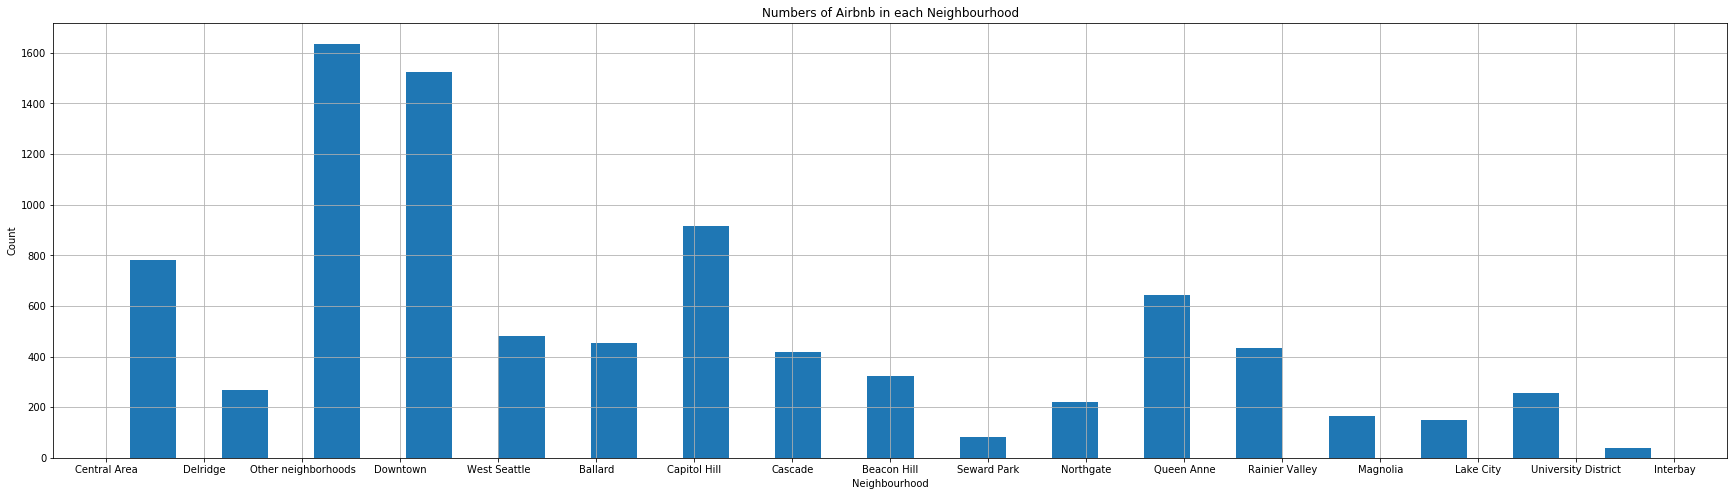

In [29]:
df2['neighbourhood_group'].hist(bins = 17, figsize=(30,8), rwidth=0.5)
plt.ylabel('Count')
plt.xlabel('Neighbourhood')
plt.title('Numbers of Airbnb in each Neighbourhood')

In [30]:
neighbourhood_count

{'Central Area': 781,
 'Delridge': 267,
 'Other neighborhoods': 1635,
 'Downtown': 1521,
 'West Seattle': 482,
 'Ballard': 453,
 'Capitol Hill': 915,
 'Cascade': 418,
 'Beacon Hill': 322,
 'Seward Park': 83,
 'Northgate': 220,
 'Queen Anne': 644,
 'Rainier Valley': 431,
 'Magnolia': 163,
 'Lake City': 148,
 'University District': 255,
 'Interbay': 39}

In [31]:
df_x = pd.DataFrame(neighbourhood_count.items())

In [32]:
df_x

,0,1
0,Central Area,781
1,Delridge,267
2,Other neighborhoods,1635
3,Downtown,1521
4,West Seattle,482
5,Ballard,453
6,Capitol Hill,915
7,Cascade,418
8,Beacon Hill,322
9,Seward Park,83


In [33]:
df_y = pd.DataFrame(neighbourhood_average_price.items())

In [34]:
df_y

,0,1
0,Central Area,151.924456
1,Delridge,98.520599
2,Other neighborhoods,123.248318
3,Downtown,187.506246
4,West Seattle,141.421162
5,Ballard,151.794702
6,Capitol Hill,148.791257
7,Cascade,167.648325
8,Beacon Hill,112.279503
9,Seward Park,129.397590


In [35]:
df_x[1].corr(df_y[1])

0.4202464598630854